## Generate recommendation statistics

### With MoviesLens dataset

In [ ]:
import main_movie_lens

In [ ]:
main_movie_lens.main()

### With Jester Joke dataset

In [7]:
import main_jester_joke

150 items.
150 final items.
54904 users.
1842083 ratings.
274236 final ratings.
6687 final users.


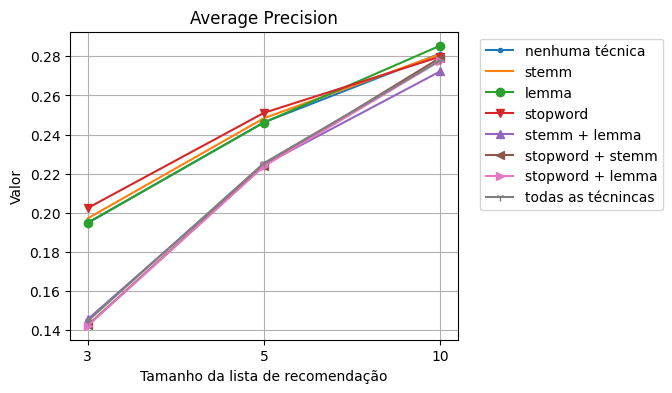

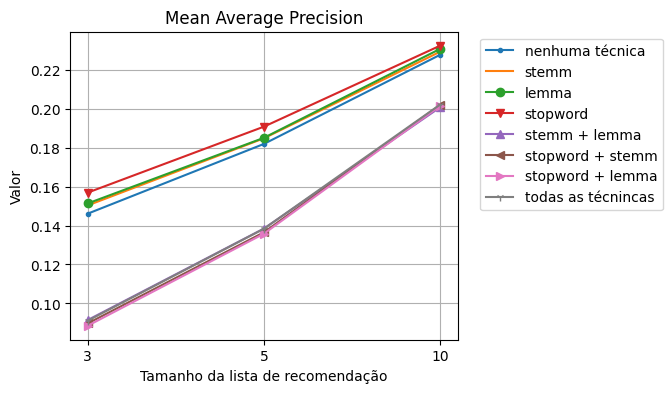

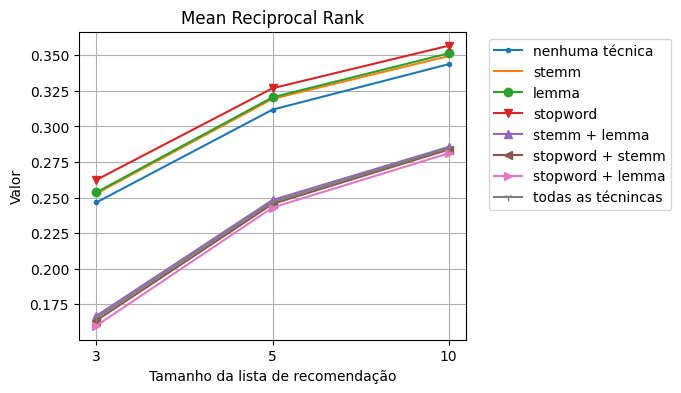

  metric  list_size   min_per   max_per min_technique max_techinque
0    prc          3  0.102354  3.940635         lemma      stopword
1    prc          5  0.850134  1.967452         stemm      stopword
2    prc         10  1.445655  1.445655         lemma         lemma
3     ap          3  2.899869  7.397510         stemm      stopword
4     ap          5  1.590768  4.878904         stemm      stopword
5     ap         10  0.695623  2.054958         stemm      stopword
6     rr          3  2.526529  6.427489         stemm      stopword
7     rr          5  2.434658  4.822157         stemm      stopword
8     rr         10  1.655120  3.770991         stemm      stopword


In [8]:
main_jester_joke.main()